1.1

Matplotlib is building the font cache; this may take a moment.


(1427, 2100, 3)


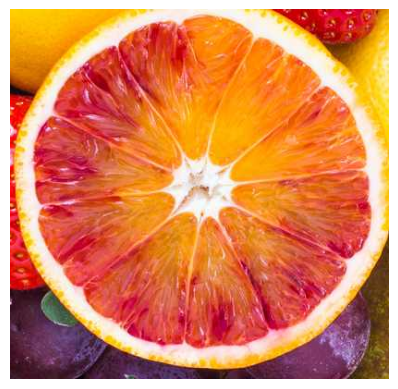

In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh từ file
data = iio.imread('fruit.jpg')

# Cắt một phần của ảnh (khu vực chứa quả cam chẳng hạn)
bmg = data[800:1200, 570:980]

# In kích thước ảnh gốc
print(data.shape)

# Lưu phần ảnh đã cắt thành file mới
iio.imsave('orange.jpg', bmg)

# Hiển thị ảnh đã cắt
plt.imshow(bmg)
plt.axis('off')  # Ẩn trục nếu muốn
plt.show()


1.2

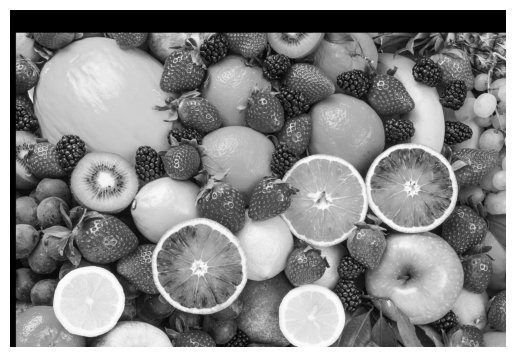

In [4]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh dưới dạng ảnh xám (grayscale)
data = iio.imread('fruit.jpg', mode='F')
# Dịch chuyển ảnh: 100 pixel theo chiều dọc, 25 pixel theo chiều ngang
bdata = nd.shift(data, (100, 25))

# Hiển thị ảnh đã dịch chuyển
plt.imshow(bdata, cmap='gray')  # Dùng cmap='gray' để hiển thị ảnh xám đúng
plt.axis('off')  # Ẩn trục
plt.show()


1.3

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


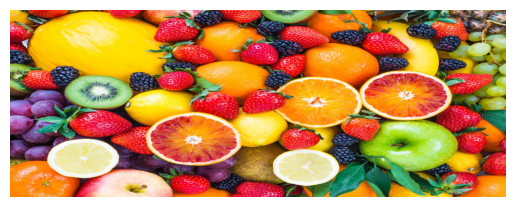

In [5]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh màu
data = iio.imread('fruit.jpg')
print(data.shape)

# Phóng to ảnh lên 2 lần (mọi chiều)
bdata = nd.zoom(data, 2)
print(bdata.shape)

# Phóng to riêng theo chiều cao và rộng, giữ nguyên kênh màu (RGB)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)

# Thu nhỏ ảnh lại: chiều cao 0.5, chiều rộng 0.9, giữ nguyên kênh màu
data3 = nd.zoom(data, (0.5, 0.9, 1))

# Hiển thị ảnh đã thu nhỏ
plt.imshow(data3)
plt.axis('off')
plt.show()


1.4

(1427, 2100, 3)


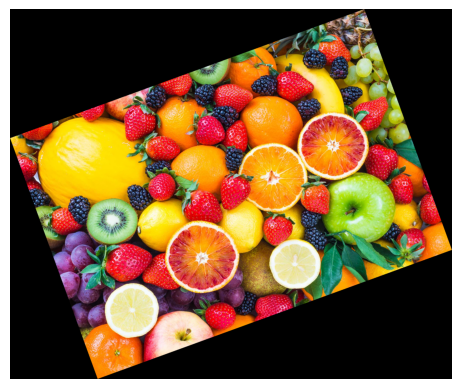

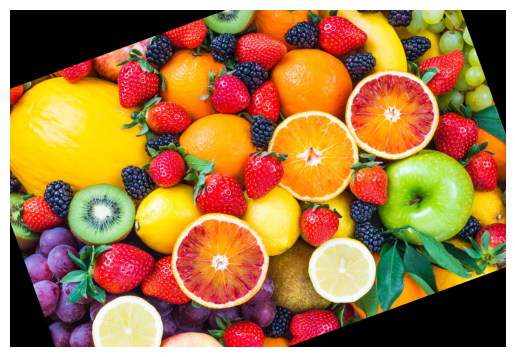

In [6]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh
data = iio.imread('fruit.jpg')
print(data.shape)

# Xoay ảnh 20 độ (có thay đổi kích thước để giữ toàn bộ ảnh)
d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.axis('off')
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.axis('off')
plt.show()


1.5

(309, 515)


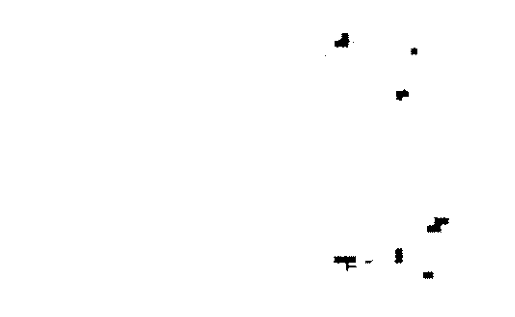

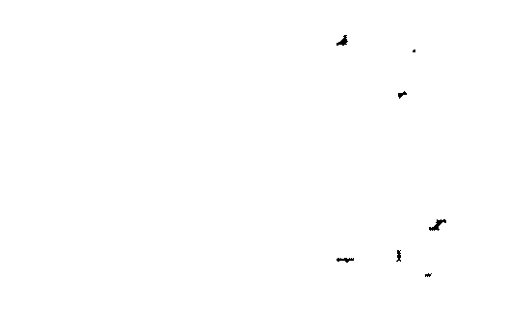

In [7]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh grayscale
data = iio.imread('world_cup.jpg', mode='F')  # Dùng mode='F' thay vì as_gray=True
print(data.shape)

# Chuyển ảnh sang nhị phân (binary): giá trị > 0.5 sẽ thành 1, còn lại là 0
binary = data > 0.5

# Giãn nhị phân 1 lần
d1 = nd.binary_dilation(binary)
plt.imshow(d1, cmap='gray')
plt.axis('off')
plt.show()

# Giãn nhị phân 3 lần
d2 = nd.binary_dilation(binary, iterations=3)
plt.imshow(d2, cmap='gray')
plt.axis('off')
plt.show()


1.6

(309, 515)


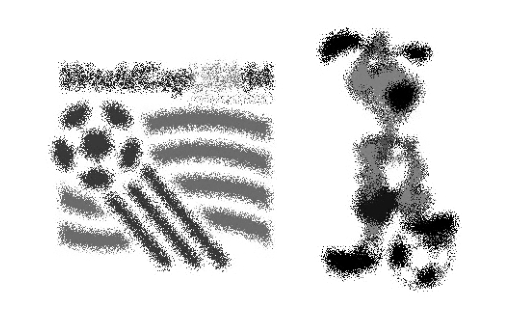

In [8]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh dưới dạng grayscale
data = iio.imread("world_cup.jpg", mode="F")
print(data.shape)

# Lấy chiều cao, chiều rộng
V, H = data.shape

# Tạo lưới chỉ số
M = np.indices((V, H))

# Biên độ nhiễu
d = 5

# Tạo nhiễu ngẫu nhiên 
q = 2 * d * np.random.ranf(M.shape) - d

# Tọa độ mới sau khi bị nhiễu
mp = (M + q).astype(int)

# Đảm bảo chỉ số nằm trong giới hạn ảnh
mp[0] = np.clip(mp[0], 0, V - 1)
mp[1] = np.clip(mp[1], 0, H - 1)

# Lấy giá trị ảnh tại vị trí đã bị nhiễu
d1 = data[mp[0], mp[1]]

# Hiển thị ảnh bị nhiễu
plt.imshow(d1, cmap='gray')
plt.axis('off')
plt.show()


1.7

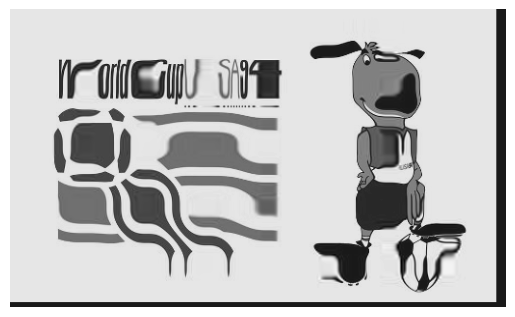

In [9]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Hàm biến đổi hình học
def GeoFun(outcoord):
    # outcoord là (y, x) => trả về (y', x') tại tọa độ nguồn
    y, x = outcoord
    new_y = y + 10 * np.cos(y / 10.0)
    new_x = x + 10 * np.cos(x / 10.0)
    return new_y, new_x

# Đọc ảnh dưới dạng grayscale (mode='F')
data = iio.imread('world_cup.jpg', mode='F')

# Biến đổi hình học
dl = nd.geometric_transform(data, GeoFun)

# Hiển thị ảnh kết quả
plt.imshow(dl, cmap='gray')
plt.axis('off')
plt.show()
